In [1]:
import warnings
warnings.filterwarnings('ignore')

In this project we are using the transfer learning technique.using the inceptionV3 for it

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The Dataset link in the google colab: dataset Link: https://drive.google.com/drive/folder...

In [3]:
from tensorflow import keras
from tensorflow.keras.layers import Flatten,Dense,Lambda,Input
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from glob import glob
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

In [4]:
! git clone https://github.com/akhilcj90/cotton_dieseas_prediction.git

fatal: destination path 'cotton_dieseas_prediction' already exists and is not an empty directory.


In [5]:
# we are providing the image_height and the image_size of the picture 
# taking the training and the testing data 
image_size = [299,299] # in the inceptionv3 normally we are using this shape
train_data = '/content/drive/My Drive/train'
test_data = '/content/cotton_dieseas_prediction/test'

In [6]:
## now introducing the transer learning model
model_inception = InceptionV3(include_top=False,input_shape=image_size+[3])

In [7]:
# now we are giving the cammand that not all the weights have to retrain
 # we do not need to retrain all the weights

In [8]:
for layer in model_inception.layers:
  layer.trainable = False


In [9]:
# summary of our inception model
model_inception.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [10]:
# to get the number of outputs w
folders = glob('/content/drive/My Drive/train/*')

we are flattening this to make arrangemnts on our own for the futher output layers

In [11]:
x = Flatten()(model_inception.output)

In [12]:
prediction = Dense(len(folders),activation='softmax')(x)

# now creating the model object we are using 
model = Model(inputs = model_inception.input,outputs = prediction)

In [13]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [14]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [15]:
# we are making the data augmentation method in the dataset
train_data_augment = ImageDataGenerator(rescale=1./255,horizontal_flip=True,vertical_flip=True,zoom_range=0.2,shear_range=0.2)
test_data_augment = ImageDataGenerator(rescale=1./255)
# we are only doing the data augmentation in the test data only

In [16]:
training_set = train_data_augment.flow_from_directory(train_data,target_size=(299,299),batch_size=16)
testing_set = test_data_augment.flow_from_directory(test_data,target_size=(299,299),batch_size=16)

Found 1951 images belonging to 4 classes.
Found 18 images belonging to 4 classes.


In [18]:
# now our dataset is ready for the model creation 
model_final = model.fit_generator(training_set,epochs=25,validation_data=testing_set)

Epoch 1/25
122/122 [==============================] - 1061s 9s/step - loss: 5.8585 - accuracy: 0.7586 - val_loss: 4.5948 - val_accuracy: 0.8333
Epoch 2/25
122/122 [==============================] - 50s 408ms/step - loss: 2.2387 - accuracy: 0.8621 - val_loss: 4.8250 - val_accuracy: 0.7778
Epoch 3/25
122/122 [==============================] - 49s 405ms/step - loss: 2.2058 - accuracy: 0.8949 - val_loss: 7.1715 - val_accuracy: 0.7222
Epoch 4/25
122/122 [==============================] - 49s 400ms/step - loss: 2.8835 - accuracy: 0.8826 - val_loss: 3.1299 - val_accuracy: 0.8333
Epoch 5/25
122/122 [==============================] - 52s 427ms/step - loss: 1.8792 - accuracy: 0.9221 - val_loss: 7.1407 - val_accuracy: 0.7222
Epoch 6/25
122/122 [==============================] - 51s 419ms/step - loss: 1.4702 - accuracy: 0.9400 - val_loss: 3.0995 - val_accuracy: 0.8333
Epoch 7/25
122/122 [==============================] - 50s 407ms/step - loss: 1.7961 - accuracy: 0.9308 - val_loss: 3.7793 - val_acc

In [20]:
# predciiton using the item
y_pred = np.argmax(model.predict(testing_set),axis = 1)
y_pred

array([1, 2, 3, 1, 1, 1, 0, 1, 2, 3, 2, 1, 2, 3, 3, 0, 0, 2])

In [21]:
### Now testing the new dataset

In [22]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

In [23]:
img = image.load_img('/content/cotton-pollination.jpg',target_size=(299,299))

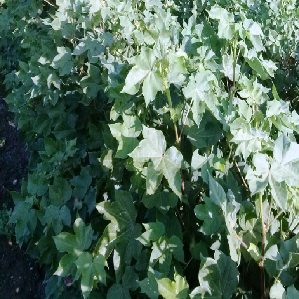

In [24]:
img

In [25]:
# converting the image into an image array
x = image.img_to_array(img)
x

array([[[195., 206., 189.],
        [199., 210., 196.],
        [210., 222., 210.],
        ...,
        [117., 148., 130.],
        [ 39.,  79.,  42.],
        [ 52.,  92.,  40.]],

       [[179., 193., 167.],
        [183., 197., 174.],
        [191., 206., 185.],
        ...,
        [ 43.,  77.,  42.],
        [ 49.,  89.,  52.],
        [ 67., 103.,  67.]],

       [[ 76.,  92.,  56.],
        [165., 182., 150.],
        [189., 209., 182.],
        ...,
        [ 63.,  99.,  55.],
        [ 58.,  95.,  62.],
        [106., 140., 115.]],

       ...,

       [[ 12.,  27.,  32.],
        [ 17.,  30.,  36.],
        [ 13.,  26.,  32.],
        ...,
        [ 79., 122., 113.],
        [ 83., 124., 116.],
        [ 80., 121., 113.]],

       [[ 13.,  28.,  33.],
        [ 14.,  29.,  34.],
        [ 10.,  23.,  29.],
        ...,
        [ 78., 121., 112.],
        [ 76., 119., 110.],
        [ 77., 120., 111.]],

       [[  7.,  22.,  27.],
        [ 13.,  28.,  33.],
        [  9.,  

In [26]:
# we have to scale the datasset by applying 255
x = x/255
x.shape

(299, 299, 3)

In [29]:
import tensorflow

In [31]:
# for the image predictions we are expanding the image size
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions

#from tf.keras.applications.inception_v3.decode_predictions
x = np.expand_dims(x,axis = 0)
image_data = preprocess_input(x)
image_data.shape

(1, 299, 299, 3)

In [32]:
model.predict(image_data)

array([[1.0000000e+00, 0.0000000e+00, 2.5096967e-38, 0.0000000e+00]],
      dtype=float32)

In [33]:
check = np.argmax(model.predict(image_data),axis = 1)
check

array([0])